In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import scvi

E:\UIC_PHD\Python_projects\parquet_read\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# --- Path Configuration ---
ref_path = r"E:\UIC_PHD\Python_projects\parquet_read\src\map_h5ad\refs\bladder_ref.h5ad"
query_path = r"F:\12_30_2025_test_azimuth_annotation\HBM262.LMHQ.472.h5ad"

In [3]:
adata = sc.read_h5ad(query_path)
ref_data = sc.read_h5ad(ref_path)

In [4]:
adata.var_names = adata.var_names.str.split('.').str[0]
ref_data.var_names = ref_data.var_names.str.split('.').str[0]

In [5]:
common_genes = adata.var_names.intersection(ref_data.var_names)
adata_sub = adata[:, common_genes].copy()
ref_sub = ref_data[:, common_genes].copy()

In [6]:
adata_sub = adata_sub[:, ref_sub.var_names].copy()

In [19]:
sc.pp.pca(ref_sub)
sc.pp.neighbors(ref_sub, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(ref_sub)

In [20]:
sc.tl.ingest(adata_sub, ref_sub, obs='cell_type')

E:\UIC_PHD\Python_projects\parquet_read\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [25]:
adata

array([[ 4.6236324,  6.4129148],
       [11.393813 , 10.111443 ],
       [10.851281 ,  6.0715847],
       ...,
       [11.228881 ,  6.2853146],
       [10.817655 ,  7.2176766],
       [ 6.7979383,  8.8348255]], shape=(8983, 2), dtype=float32)

In [29]:
adata_sub

AnnData object with n_obs × n_vars = 8983 × 30359
    obs: 'n_genes', 'n_counts', 'leiden', 'umap_density', 'cell_type', 'azimuth_label'
    var: 'hugo_symbol', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'annotation_metadata', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'umap_density_params'
    obsm: 'X_pca', 'X_umap', 'rep', 'X_umap_proj'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unscaled', 'unspliced'
    obsp: 'connectivities', 'distances'

In [28]:
adata_sub.obs['azimuth_label'] = adata_sub.obs['cell_type']
adata_sub.obsm['X_umap_proj'] = adata_sub.obsm['X_umap']

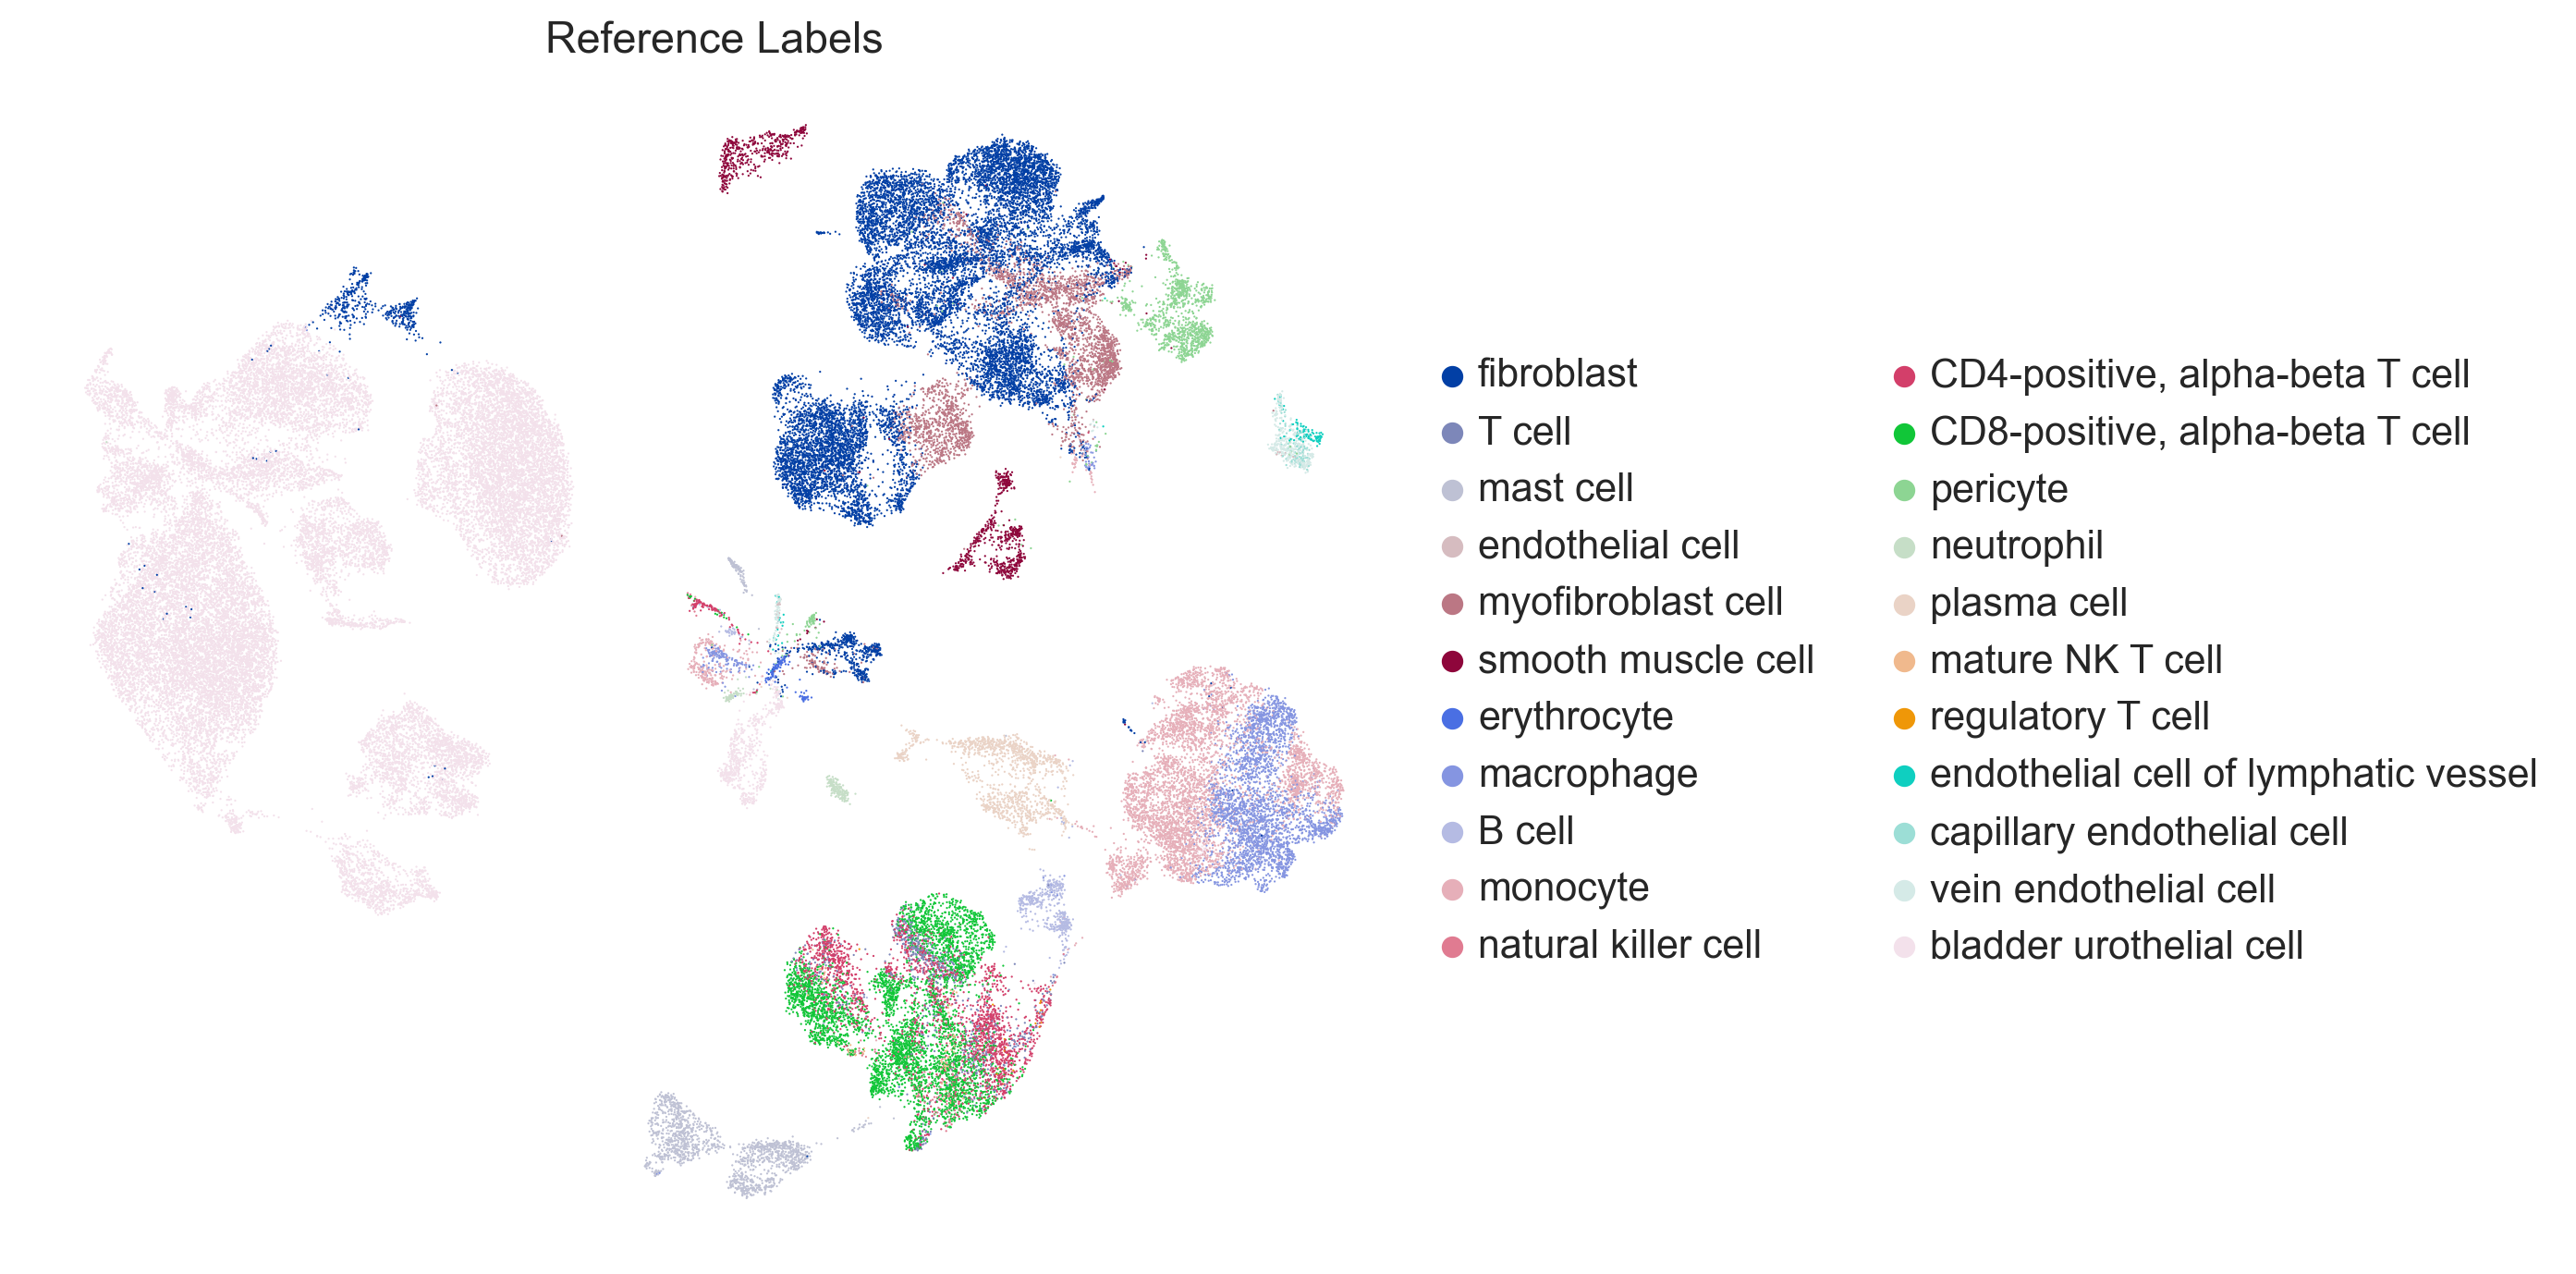

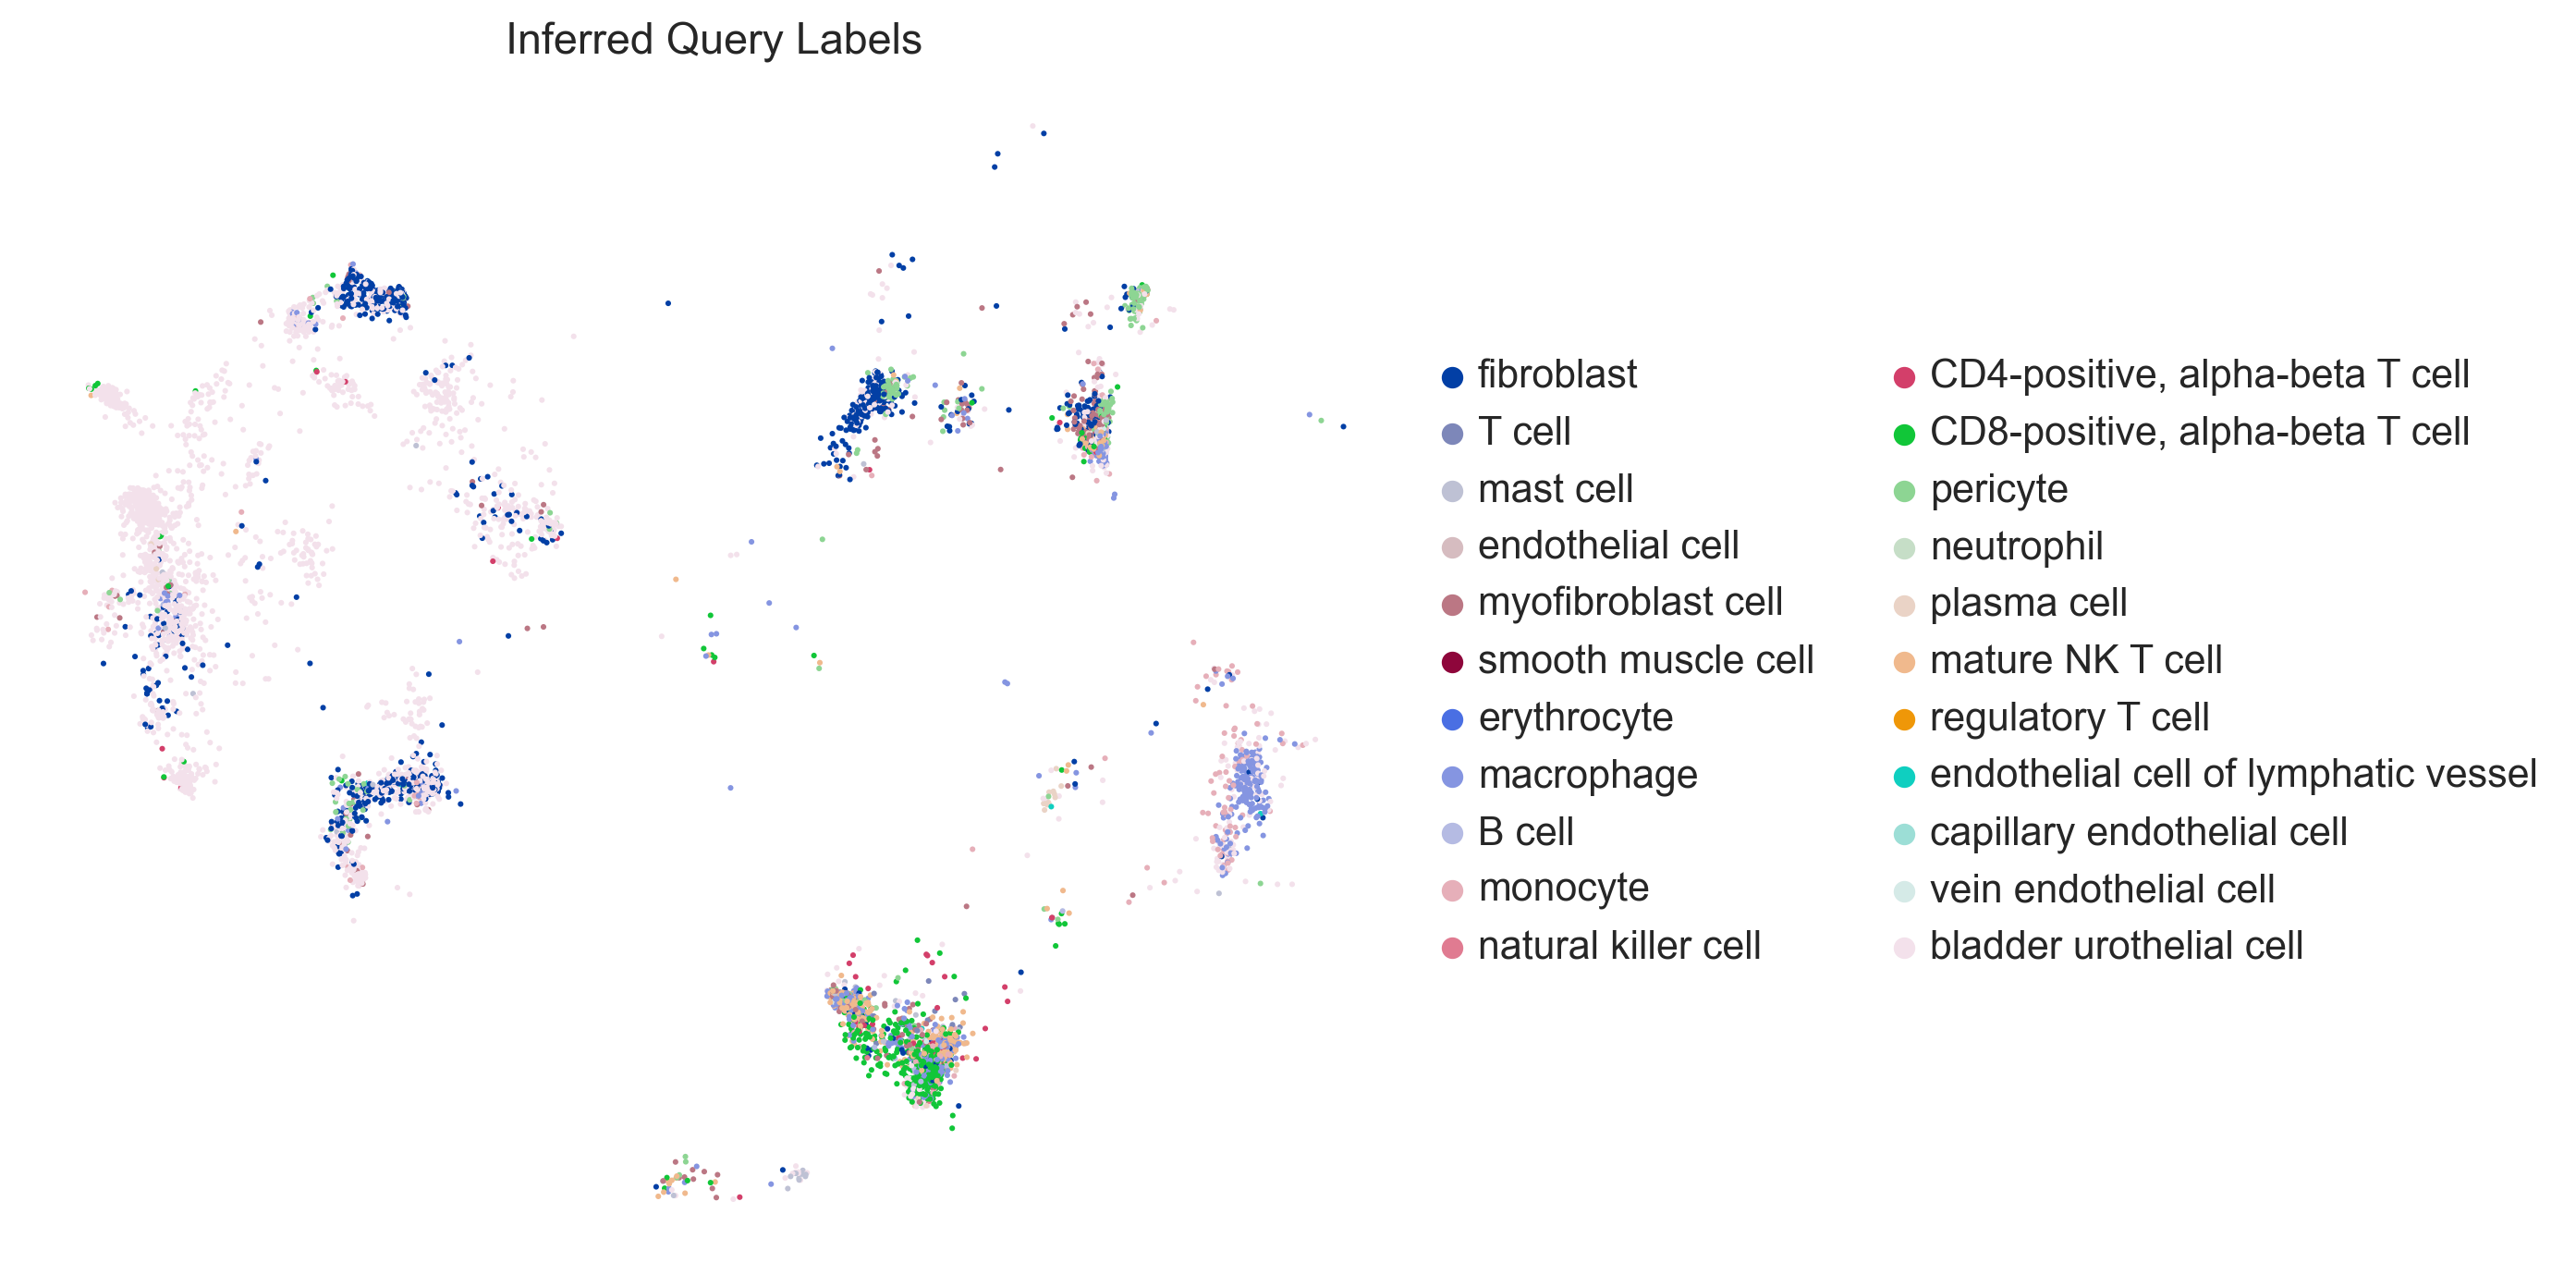

In [31]:
import scanpy as sc

# 设置全局画图参数
sc.settings.set_figure_params(dpi=120, frameon=False, figsize=(8, 7))

# 第一张图：Reference
sc.pl.embedding(
    ref_sub,
    basis="X_umap",
    color="cell_type",
    title="Reference Labels",
    show=True # 独立显示
)

# 第二张图：Query (Projected)
sc.pl.embedding(
    adata_sub,
    basis="X_umap_proj",
    color="azimuth_label",
    title="Inferred Query Labels",
    show=True # 独立显示
)

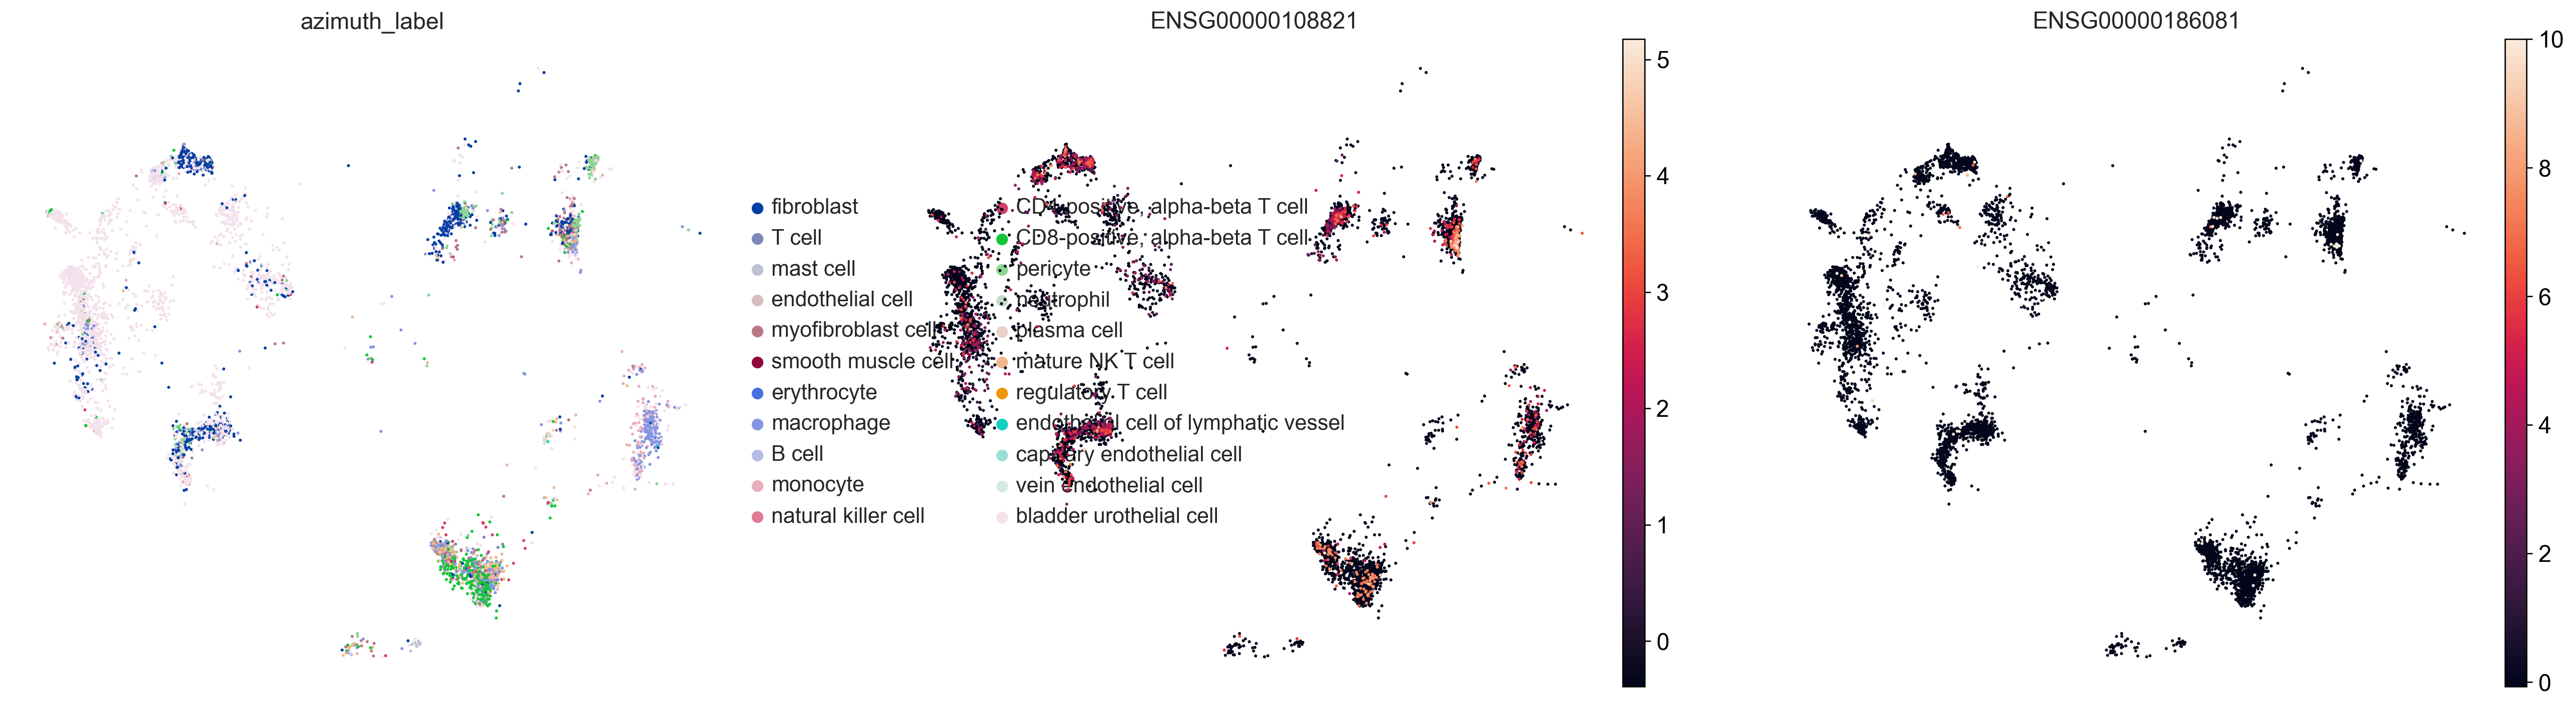

In [33]:
# 看看那些预测为 Fibroblast 的“蓝色点”是否真的表达纤维细胞基因
sc.pl.embedding(adata_sub, basis="X_umap_proj", color=['azimuth_label', 'ENSG00000108821', 'ENSG00000186081'])